<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>Lunch Byte 4/19/2019</h1>
By Kayla Besong
    
<br>
<br>
<br>Introduction to xarray with three seperate plotting examples including:  
<br>
<br>1) Standarizing a time series of temperature data at two locations 
<br>2) 4-panel contour plot of seasonal mean temperatures and geopotential heights
<br>3) Using an ENSO timeseries to generate temperature and height anomalies during events
<br>
<br>Uses 'heights_9520.nc' and 'temps_9520.nc' read in and preproccesed 
<br>from running either GettingData_XRDASK.ipynb or GettingData_XR.ipynb



<div style="clear:both"></div>
</div>

<hr style="height:2px;">

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap


### Import our previously downloaded data

In [2]:
concat_t = xr.open_dataset('temps_9520.nc')
concat_t

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, time: 2192)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2000-12-31
    level    float32 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    air      (time, lat, lon) float32 ...

In [3]:
concat_h = xr.open_dataset('heights_9520.nc')
concat_h

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, time: 2192)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2000-12-31
    level    float32 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    hgt      (time, lat, lon) float32 ...

#### Basic Components 

In [5]:
concat_h.hgt

<xarray.DataArray 'hgt' (time: 2192, lat: 37, lon: 144)>
[11678976 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2000-12-31
    level    float32 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [6]:
concat_h.dims

Frozen(SortedKeysDict({u'lat': 37, u'lon': 144, u'time': 2192}))

In [7]:
concat_h.attrs

OrderedDict()

### Merge into one dataset

In [8]:
%%time
data = concat_h.update(concat_t).load()
data

CPU times: user 5.75 ms, sys: 52.3 ms, total: 58.1 ms
Wall time: 55.6 ms


In [9]:
data['air'] = data['air'] - 273.15     #convert to Celsius 
data

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, time: 2192)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2000-12-31
    level    float32 925.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    hgt      (time, lat, lon) float32 4973.75 4973.75 4973.75 ... 5848.0 5847.0
    air      (time, lat, lon) float32 -32.450012 -32.450012 ... 21.574982 20.625

### OR if the levels bothers you, create your own

In [10]:
hgts = concat_h.hgt.values
ts = concat_t.air.values - 273.15
lats = concat_h.lat.values
lons = concat_h.lon.values
time = concat_h.time.values
level = [925., 500]

In [11]:
data2 = xr.Dataset({'height': (['time', 'lat', 'lon'], hgts),
                   'temp': (['time', 'lat', 'lon'], ts)},
                  coords = {'time': time, 'lat': lats, 'lon': lons})

data2

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, time: 2192)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2000-12-31
Data variables:
    temp     (time, lat, lon) float32 -32.450012 -32.450012 ... 21.574982 20.625
    height   (time, lat, lon) float32 4973.75 4973.75 4973.75 ... 5848.0 5847.0

# Timeseries Data

In [12]:
pit_t = data2.temp.sel(lat = 40, lon = 280)       # selecting by specific lat and lon 
pit_t

<xarray.DataArray 'temp' (time: 2192)>
array([  4.074982,  -5.149994, -10.100006, ..., -10.524994, -10.625   ,
       -11.699982], dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 280.0
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2000-12-31

In [13]:
mia_t = data2.temp.isel(lat = -11, lon = 112)       # selecting by index lat and lon 
mia_t

<xarray.DataArray 'temp' (time: 2192)>
array([17.950012, 18.      , 17.649994, ..., 15.100006, 10.75    ,  7.5     ],
      dtype=float32)
Coordinates:
    lat      float32 25.0
    lon      float32 280.0
  * time     (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2000-12-31

/Users/kaylabesong/anaconda2/envs/lunchbyte_besong/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


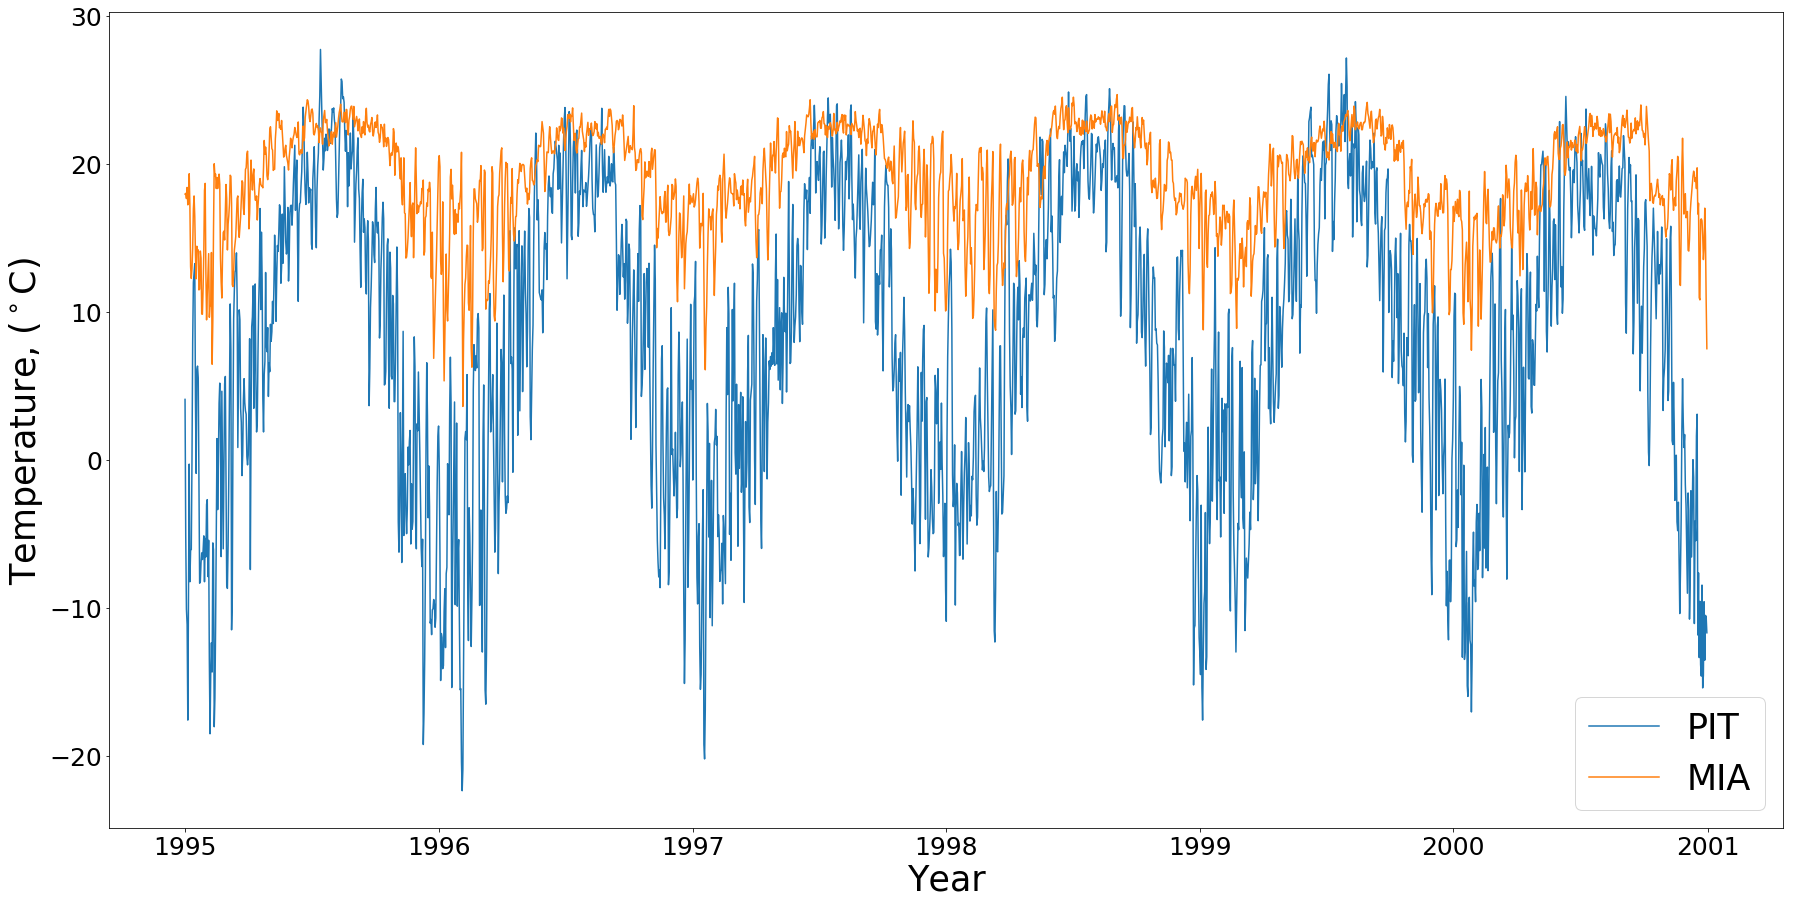

In [14]:
fig = plt.subplots(1, figsize=(30, 15), facecolor='w')


plt.plot(pit_t.time, pit_t)
plt.plot(mia_t.time, mia_t)

plt.xlabel('Year', fontsize = 35)
plt.ylabel('Temperature, ($^\circ$C)', fontsize = 35)
plt.tick_params(labelsize=25)
plt.legend(['PIT', 'MIA'], fontsize = 35);


In [15]:
%%time

climatology1 = mia_t.groupby('time.month').mean('time')                # use the groupby function to find the climatology or mean 
anomalies1 = mia_t.groupby('time.month') - climatology1                # subtract from 

climatology2 = pit_t.groupby('time.month').mean('time')
anomalies2 = pit_t.groupby('time.month') - climatology2


CPU times: user 112 ms, sys: 3.96 ms, total: 116 ms
Wall time: 113 ms


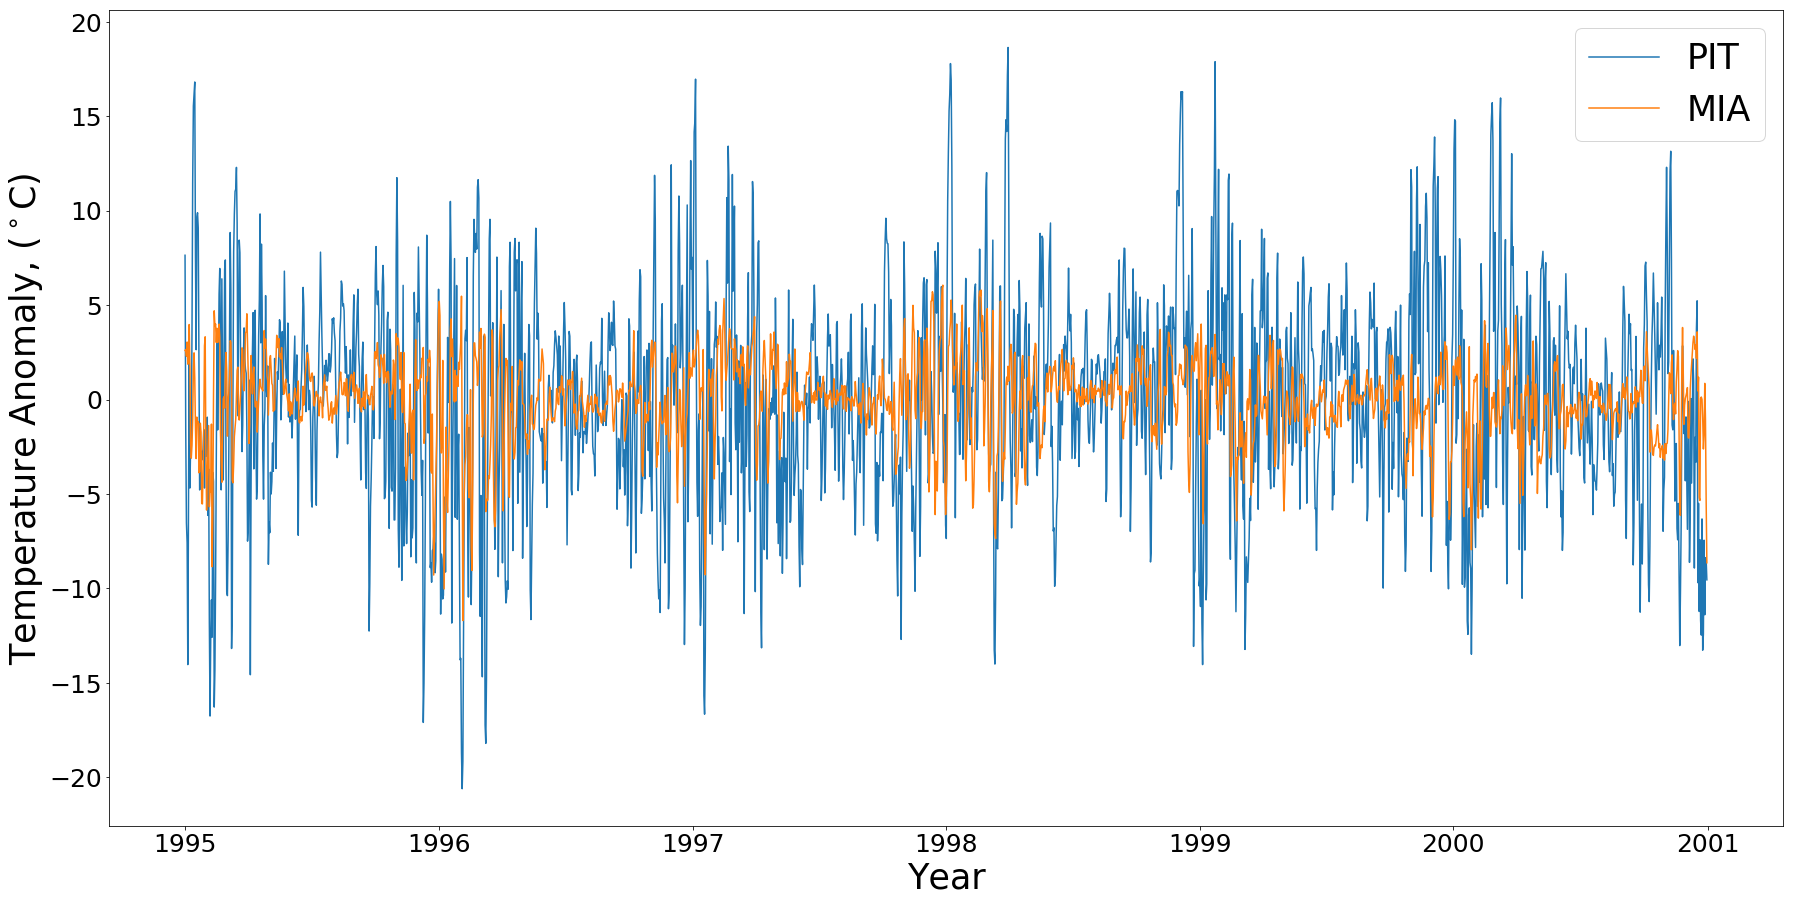

In [16]:
fig = plt.subplots(1, figsize=(30, 15), facecolor='w')

plt.plot(pit_t.time, anomalies2)
plt.plot(mia_t.time, anomalies1)
plt.xlabel('Year', fontsize = 35)
plt.ylabel('Temperature Anomaly, ($^\circ$C)', fontsize = 35)
plt.tick_params(labelsize=25)
plt.legend(['PIT', 'MIA'], fontsize = 35);

In [17]:
def stand_an(ds, time_seq):                                 #create a function to make your life easier :) 

    climatology_mean = ds.groupby(time_seq).mean('time')    #time_seq = a string such as 'time.month', 'time.year', 'time.day' etc.

    climatology_std = ds.groupby(time_seq).std('time')

    stand_anomalies = xr.apply_ufunc(lambda x, m, s: (x - m) / s, ds.groupby(time_seq), climatology_mean, climatology_std) #standardized function 

    return stand_anomalies

CPU times: user 217 ms, sys: 7.76 ms, total: 225 ms
Wall time: 220 ms


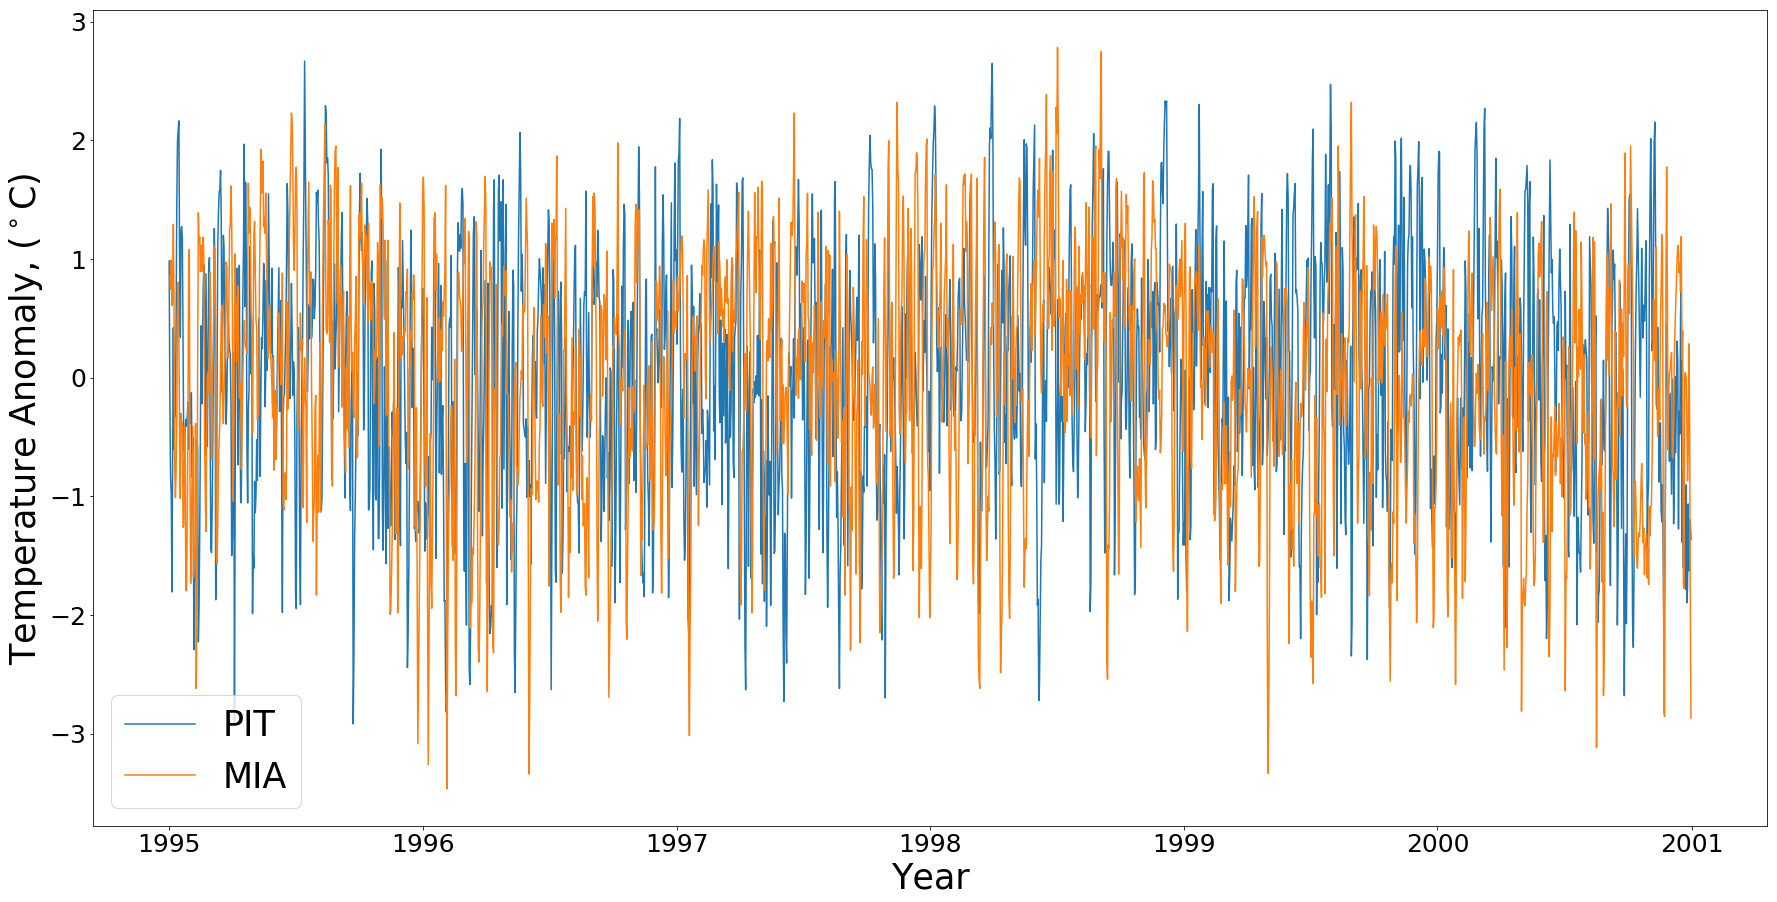

In [18]:
%%time

fig = plt.subplots(1, figsize=(30, 15), facecolor='w')

plt.plot(pit_t.time, stand_an(pit_t, 'time.month'))
plt.plot(mia_t.time, stand_an(mia_t, 'time.month'))


plt.xlabel('Year', fontsize = 35)
plt.ylabel('Temperature Anomaly, ($^\circ$C)', fontsize = 35)
plt.tick_params(labelsize=25)
plt.legend(['PIT', 'MIA'], fontsize = 35);

# Seasonal Averaging and Plotting

In [19]:
seasonal = data2.groupby('time.season').mean(dim = 'time')              # use the 'powerful' groupby funtion to find seasonal averages 
seasonal

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, season: 4)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    temp     (season, lat, lon) float32 -25.930496 -25.930496 ... 19.37766
    height   (season, lat, lon) float32 5042.1377 5042.1377 ... 5856.8755

In [20]:
def mapping(subplot):
        
    ll = 180.        # lower lon bounds
    ul = 330.        # upper lon bounds
    lllat=20.        # lower lat bounds
    urlat=80.        # upper lat bounds

    m = Basemap(projection='cyl',llcrnrlat=lllat,urcrnrlat=urlat,\
            llcrnrlon=ll,urcrnrlon=ul,resolution='l' , ax = subplot, lon_0 = 0)         # establishing basemap, ax = subplot = key feature to make function/subplot loop work    
    

    m.drawcountries(linewidth=0.2)                                                      # map design specifications
    m.drawcoastlines(linewidth=0.2)
    m.drawmapboundary(fill_color='white')
    
    parallels = np.arange(25.,85.,20.)
    meridians = np.arange(-180.,181.,30.)

    m.drawparallels(parallels, labels=[1,0,0,0], fontsize = 20, dashes=[6,900])
    m.drawmeridians(meridians, labels=[1,1,0,1], fontsize=20, dashes=[6,900])

    return m

In [21]:
def contours(subplot, temps, heights):
    
    lat_lon1 = False       # set to true if crossing meridian or your data might have gaps or not show up at all! Criteria for lat_lon in contour or contourf 
    
    lons = temps.lon
    lats = temps.lat
    temps = temps.values   
    hgt = heights.values
    
    m = mapping(subplot)
    
    px,py = np.meshgrid(lons, lats)          # mesh lat/lon numpy arrays  
    x,y = m(px, py)                          # apply meshed grid to map projection
            
    levels1 = np.arange(-40, 42, 2)          # set interval for temperature contours

    tc = m.contourf(x, y, temps, 35, extend='both', cmap = 'seismic', latlon = lat_lon1, levels = levels1, vmin = -40, vmax = 40) 
    

    levels2 = np.arange(5000, 6050, 100)     # set interval for geopotential contours

    h_contour = m.contour(x, y, hgt, 15, extend = 'both', latlon = lat_lon1, colors = 'k', alpha = 0.75, levels = levels2)     # alpha sets transparency 
    h_contour.clabel(fontsize=15, colors='k', inline=1, inline_spacing=8, levels = levels2, fmt='%i', rightside_up=True, use_clabeltext=True);  
    
    return tc         # return contour plot for use in colorbar 

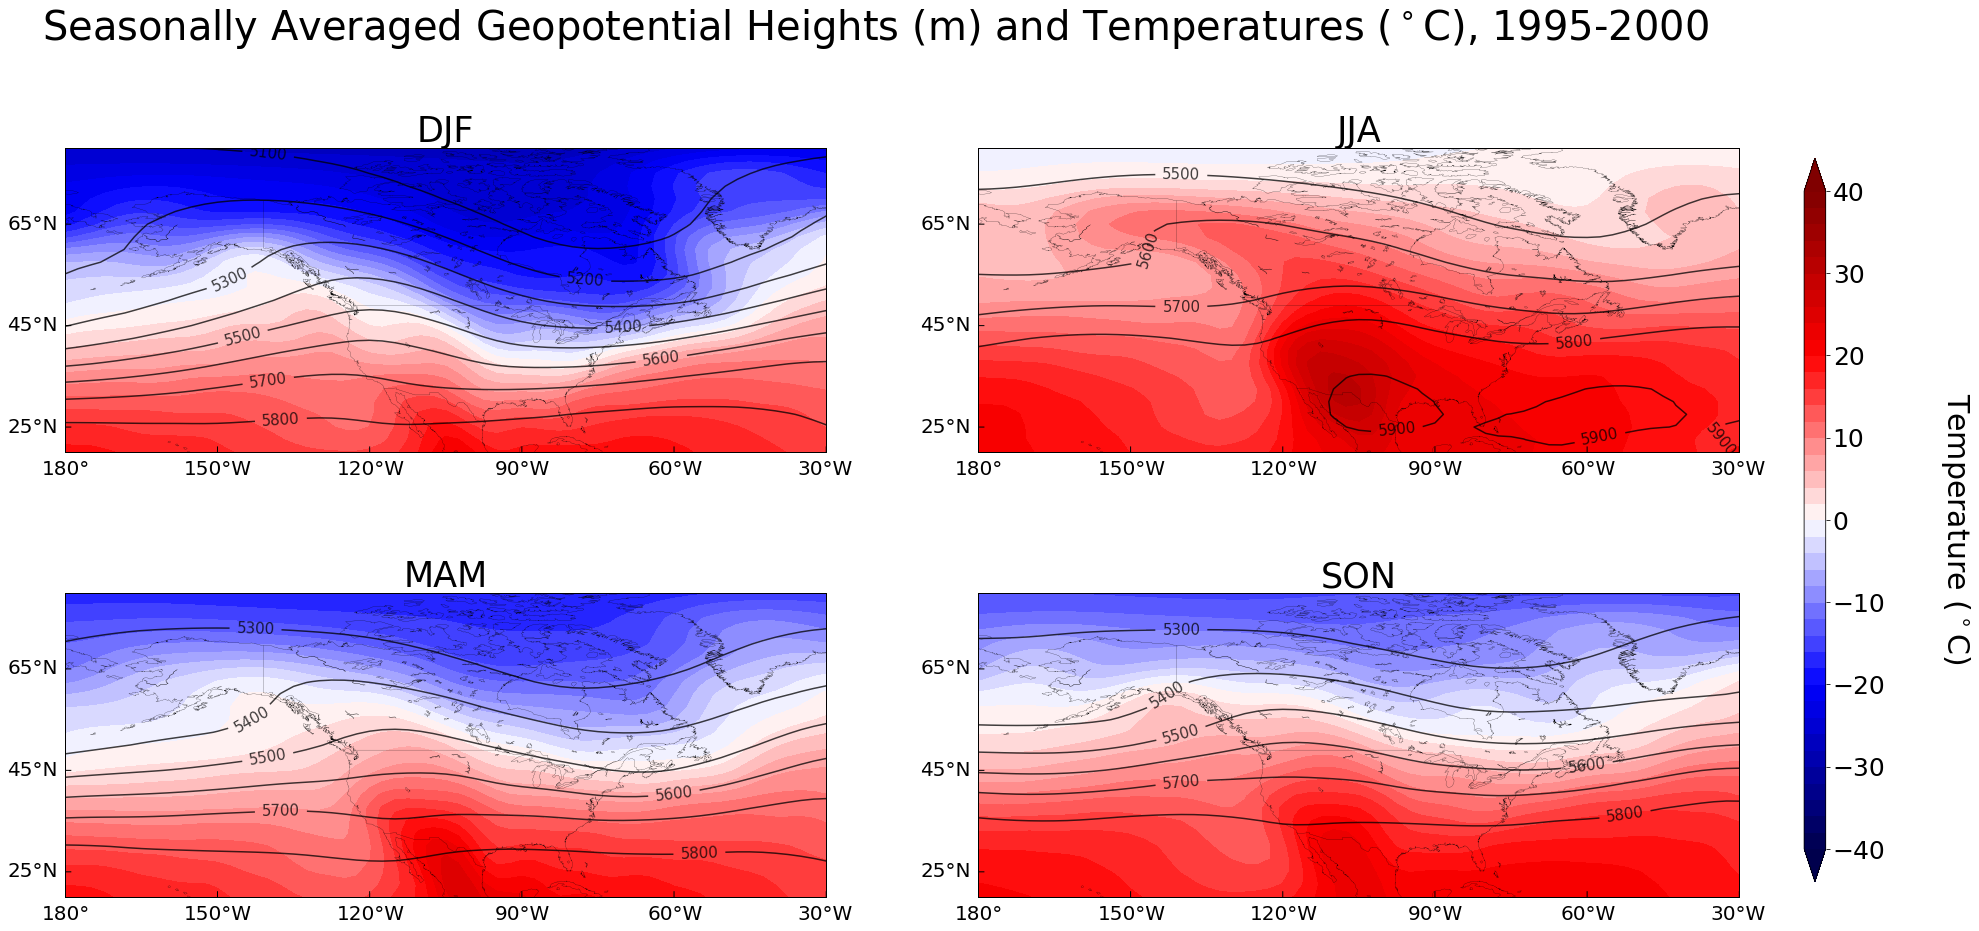

In [22]:
labels = seasonal.season.values       # set array for plot labels 

fig, axes = plt.subplots(2,2, figsize=(30, 15), facecolor='w', edgecolor='k', sharex =False, sharey = False)   # establish subplot figure 



for i, ax in enumerate(fig.axes):                                       # enumerate axes so that you dont have [0,1] etc., just 0,1,2,3

    ax.set_title(labels[i], fontsize = 35)
    ax1 = contours(ax, seasonal['temp'][i], seasonal['height'][i])       # call created function and loop through and plot seasons based on data 
    


cax = fig.add_axes([0.93, 0.17, 0.01, 0.67])                            # customizing colorbar for one large one for plot by creating new axis
cb = plt.colorbar(ax1, cax=cax)
cb.ax.tick_params(labelsize=25)
    
fig.suptitle('Seasonally Averaged Geopotential Heights (m) and Temperatures ($^\circ$C), 1995-2000', fontsize=40, ha = 'center')     # don't forget to label :D 
fig.text(1, 0.6, "Temperature ($^\circ$C)", ha='center', fontsize=30, rotation = 270);


#plt.savefig('nameyourplothere.png', bbox_inches = "tight")     # bbox_inches limits the extra whitespcae once saved 

# Let's combine the past two sections with a new dataset 

In [23]:
nino34 = xr.open_dataset('nino34.nc')           # read in data

In [24]:
nino34                                          # explore data

<xarray.Dataset>
Dimensions:  (time: 748)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2012-04-01
Data variables:
    index    (time) float64 ...

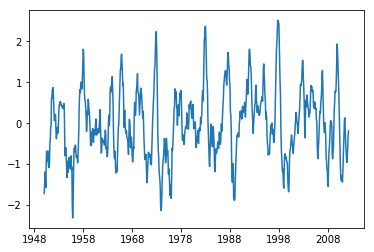

In [25]:
plt.plot(nino34.time, nino34.index)            # explore data

In [26]:
nino34 = nino34.sel(time = slice('1995-01-01', '2000-12-31'))           # reduce time frame to study period

In [27]:
nino34

<xarray.Dataset>
Dimensions:  (time: 72)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-01 1995-02-01 ... 2000-12-01
Data variables:
    index    (time) float64 1.18 0.94 0.68 0.5 0.1 ... -0.39 -0.53 -0.59 -0.74

In [28]:
nino_sd = nino34.std()
elnino = nino34.where(nino34 > 0.43*nino_sd, drop = True)              # use the where function to locate values greater than .43sigma and 
lanina = nino34.where(nino34 < 0.43*nino_sd, drop = True)              # drop the rest of the values that do not apply

In [29]:
elnino, lanina

(<xarray.Dataset>
 Dimensions:  (time: 17)
 Coordinates:
   * time     (time) datetime64[ns] 1995-01-01 1995-02-01 ... 1998-05-01
 Data variables:
     index    (time) float64 1.18 0.94 0.68 0.5 0.85 ... 2.43 1.97 1.43 0.98 0.7,
 <xarray.Dataset>
 Dimensions:  (time: 55)
 Coordinates:
   * time     (time) datetime64[ns] 1995-05-01 1995-06-01 ... 2000-12-01
 Data variables:
     index    (time) float64 0.1 0.27 0.14 -0.33 -0.5 ... -0.39 -0.53 -0.59 -0.74)

In [30]:
elnino_d = (data2.sel(time = elnino.time).mean('time') - data2.mean('time'))         # find the difference between mean temperatures during and not during El nino
elnino_d

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    temp     (lat, lon) float32 -2.6355047 -2.6355047 ... 0.78948975 0.7535057
    height   (lat, lon) float32 -64.03125 -64.03125 ... 13.510254 12.651855

In [31]:
lanina_d = (data2.sel(time = lanina.time).mean('time')  - data2.mean('time'))      # find the difference between mean temperatures during and not during La Nina
lanina_d

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    temp     (lat, lon) float32 0.27807617 0.27807617 ... -0.11036873
    height   (lat, lon) float32 5.6503906 5.6503906 ... -3.8847656 -3.6557617

In [32]:
def anomaly_map(subplot, anomaly, levels1):
    
    lat_lon1 = False       # set to true if crossing meridian or your data might have gaps or not show up at all! Criteria for lat_lon in contour or contourf 
    
    lons = anomaly.lon
    lats = anomaly.lat
    anomaly1 = anomaly.values   
    
    m = mapping(subplot)
    
    px,py = np.meshgrid(lons, lats)          # mesh lat/lon numpy arrays  
    x,y = m(px, py)                          # apply meshed grid to map projection
       
        
    tc = m.contourf(x, y, anomaly1, 35, extend='both', cmap = 'seismic', latlon = lat_lon1, levels = levels1) 

    
    return tc         # return contour plot for use in colorbar 

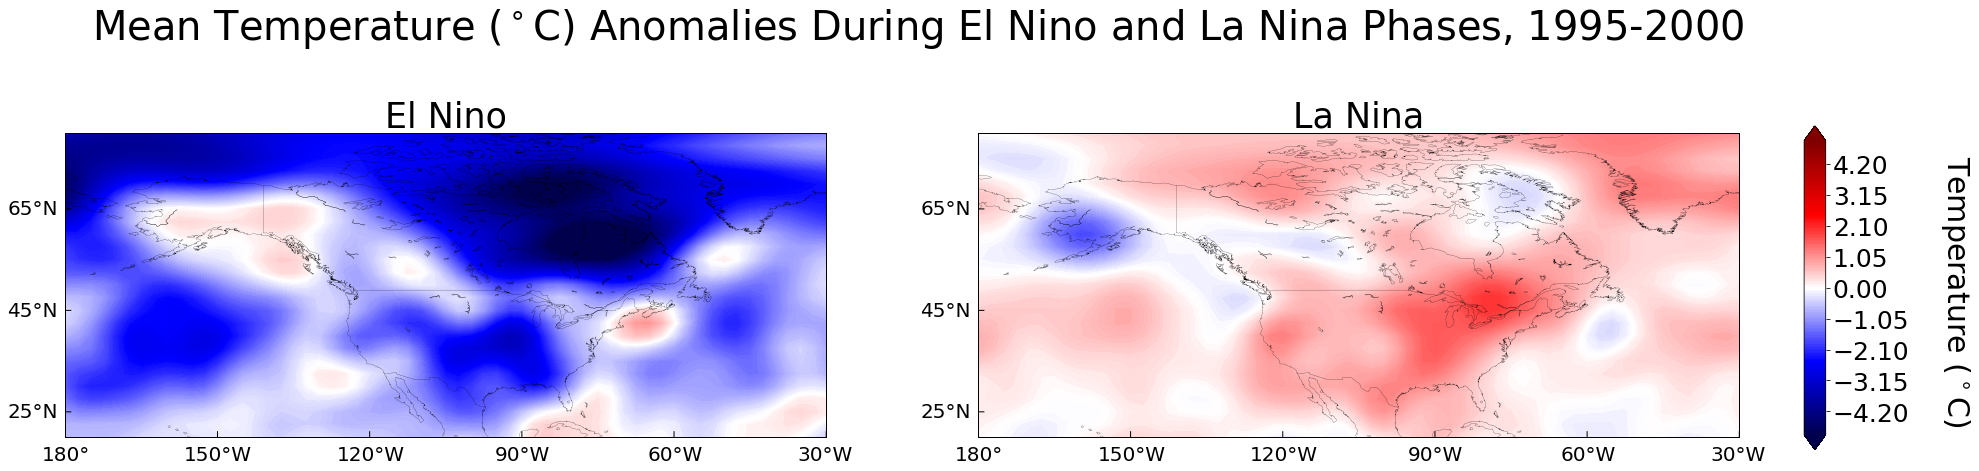

In [33]:
phase = ['El Nino', 'La Nina']       # set array for plot labels 
var = [elnino_d['temp'], lanina_d['temp']]

fig, axes = plt.subplots(1,2, figsize=(30, 15), facecolor='w', edgecolor='k', sharex =False, sharey = False)   # establish subplot figure 



for i, ax in enumerate(fig.axes):                                       # enumerate axes so that you dont have [0,1] etc., just 0,1,2,3

    ax.set_title(phase[i], fontsize = 35)
    ax1 = anomaly_map(ax, var[i], np.arange(-5, 5.05, 0.05))               # call created function and loop through and plot seasons based on data 
    


cax = fig.add_axes([0.93, 0.35, 0.01, 0.3])                            # customizing colorbar for one large one for plot by creating new axis
cb = plt.colorbar(ax1, cax=cax)
cb.ax.tick_params(labelsize=25)
    
fig.text(0.52, 0.73, 'Mean Temperature ($^\circ$C) Anomalies During El Nino and La Nina Phases, 1995-2000', fontsize=40, ha = 'center')     # don't forget to label :D 
fig.text(1, 0.6, "Temperature ($^\circ$C)", ha='center', fontsize=30, rotation = 270);


#plt.savefig('nameyourplothere.png', bbox_inches = "tight")     # bbox_inches limits the extra whitespcae once saved 

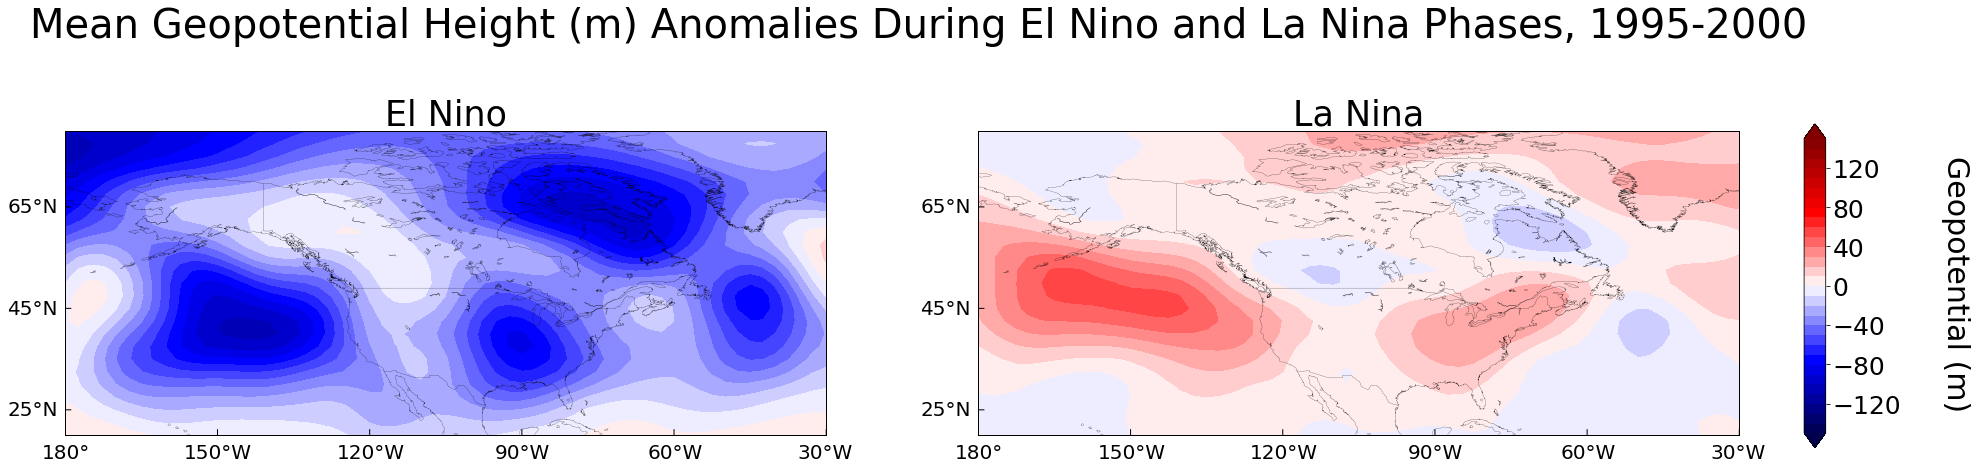

In [34]:
phase = ['El Nino', 'La Nina']       # set array for plot labels 
var = [elnino_d['height'], lanina_d['height']]

fig, axes = plt.subplots(1,2, figsize=(30, 15), facecolor='w', edgecolor='k', sharex =False, sharey = False)   # establish subplot figure 



for i, ax in enumerate(fig.axes):                                       # enumerate axes so that you dont have [0,1] etc., just 0,1,2,3

    ax.set_title(phase[i], fontsize = 35)
    ax1 = anomaly_map(ax, var[i], np.arange(-150, 160, 10))               # call created function and loop through and plot seasons based on data 
    


cax = fig.add_axes([0.93, 0.35, 0.01, 0.3])                            # customizing colorbar for one large one for plot by creating new axis
cb = plt.colorbar(ax1, cax=cax)
cb.ax.tick_params(labelsize=25)
    
fig.text(0.52, 0.73, 'Mean Geopotential Height (m) Anomalies During El Nino and La Nina Phases, 1995-2000', fontsize=40, ha = 'center')     # don't forget to label :D 
fig.text(1, 0.6, "Geopotential (m)", ha='center', fontsize=30, rotation = 270);


#plt.savefig('nameyourplothere.png', bbox_inches = "tight")     # bbox_inches limits the extra whitespcae once saved 

### Some useful links and tutorials 

http://xarray.pydata.org/en/stable/time-series.html

http://xarray.pydata.org/en/stable/weather-climate.html

http://pure.iiasa.ac.at/id/eprint/14952/1/xarray-tutorial-egu2017-answers.pdf


http://xarray.pydata.org/en/stable/dask.html